In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [2]:
df = pd.read_csv("../../haberman-clustering.csv")

In [3]:
df.head()

,Age,Op_year,axil_nodes
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10


In [4]:
df.shape

(282, 3)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,282.0,52.450355,10.827638,30.0,44.0,52.0,60.0,83.0
Op_year,282.0,62.932624,3.266197,58.0,60.0,63.0,66.0,69.0
axil_nodes,282.0,4.319149,7.388863,0.0,0.0,1.0,5.0,52.0


In [6]:
scaler = StandardScaler()

In [7]:
scaled_df = scaler.fit_transform(df)

In [8]:
model = Birch()

In [9]:
cluster_labels = model.fit_predict(scaled_df)

In [10]:
df['labels'] = cluster_labels
pred = cluster_labels

In [11]:
df.head()

,Age,Op_year,axil_nodes,labels
0,30,62,3,0
1,30,65,0,0
2,31,59,2,0
3,31,65,4,0
4,33,58,10,0


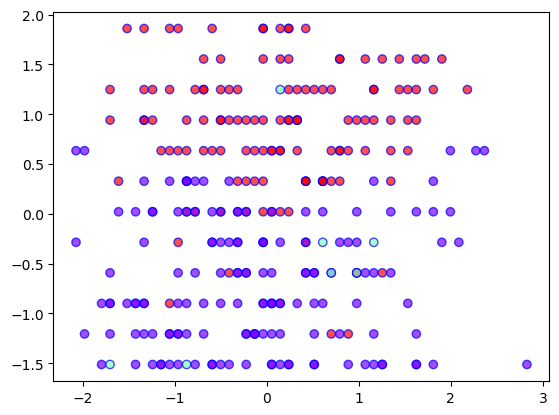

In [12]:
dataset = scaled_df
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [13]:
print(F"Silhoutte Scores : {silhouette_score(scaled_df,cluster_labels)} ")
print(F"Davies Bouldin Scores : {davies_bouldin_score(scaled_df,cluster_labels)} ")
print(F"Calinski Harabasz Scores : {calinski_harabasz_score(scaled_df,cluster_labels)} ")

Silhoutte Scores : 0.25664756164133284 
Davies Bouldin Scores : 1.280070361206991 
Calinski Harabasz Scores : 75.85312060966663 
